Data Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

loading dataset

In [2]:
df=pd.read_csv('avacado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#pd.set_option("display.max_rows,None")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [5]:
df.shape #checking the data dimensions

(16468, 14)

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58,  nan])

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Data Distribution

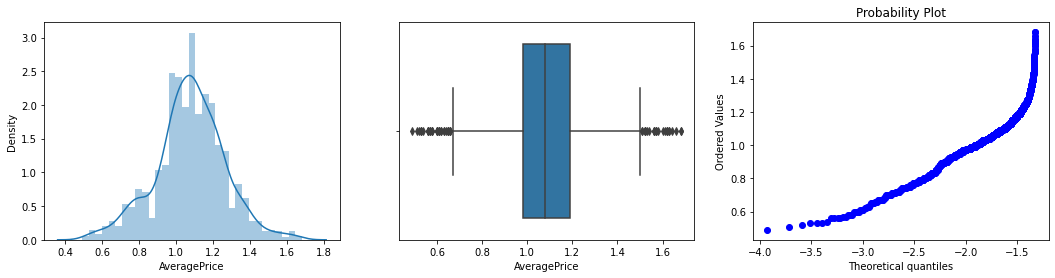

In [9]:
import seaborn as sns
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,4))
sns.distplot(df.AveragePrice,ax=ax[0])
sns.boxplot(df.AveragePrice,ax=ax[1])
from scipy import stats
stats.probplot(df['AveragePrice'],plot=ax[2])
plt.show()

In [10]:
df['type'].unique()

array(['conventional', nan], dtype=object)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

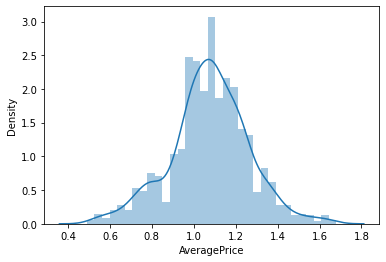

In [11]:
sn.distplot(df['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

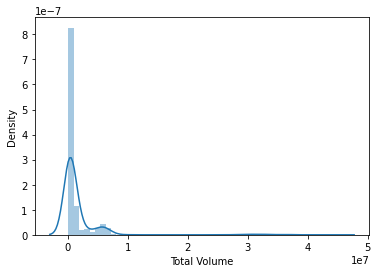

In [12]:
sn.distplot(df['Total Volume'])

<AxesSubplot:xlabel='year', ylabel='Density'>

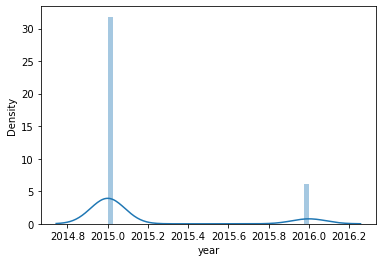

In [13]:
sn.distplot(df['year'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

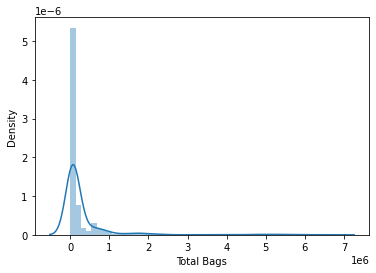

In [14]:
sn.distplot(df['Total Bags'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

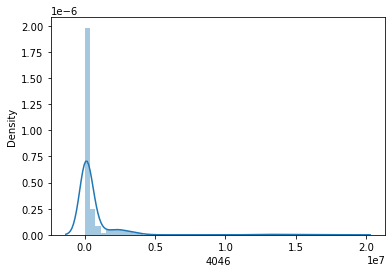

In [104]:
sn.distplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

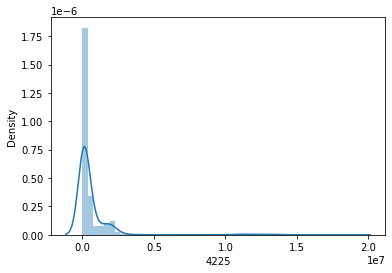

In [105]:
sn.distplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

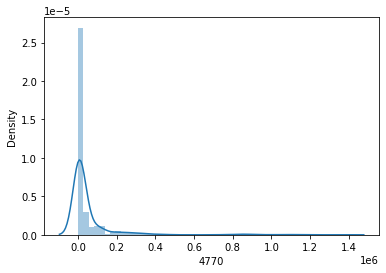

In [106]:
sn.distplot(df['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

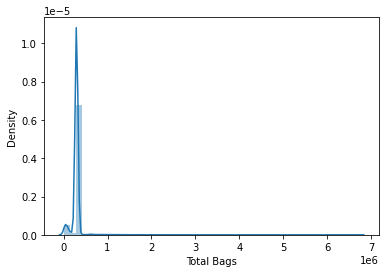

In [107]:
sn.distplot(df['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

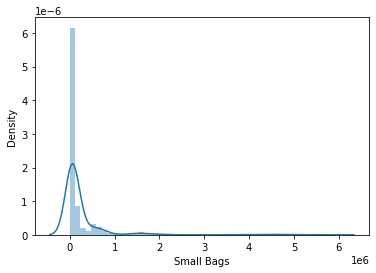

In [108]:
sn.distplot(df['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

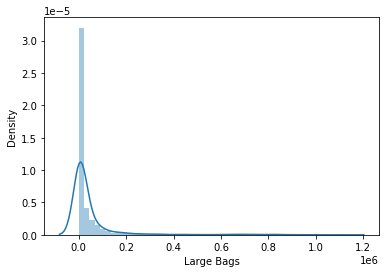

In [109]:
sn.distplot(df['Large Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

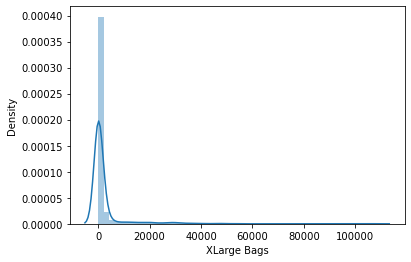

In [110]:
sn.distplot(df['XLarge Bags'])

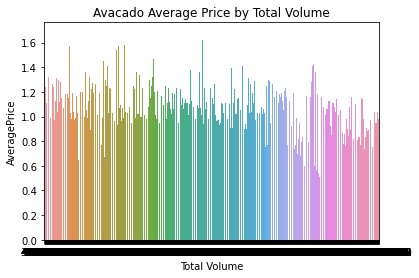

In [15]:
plt.figure()
plt.title("Avacado Average Price by Total Volume")
sns.barplot(x="Total Volume",y="AveragePrice",data = df)
plt.show()


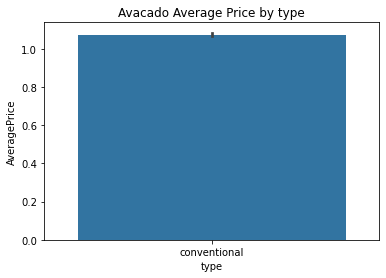

In [16]:
plt.figure()
plt.title("Avacado Average Price by type")
sns.barplot(x="type",y="AveragePrice",data = df)
plt.show()

since other type of avacados are not present it shows only conventional type avacados

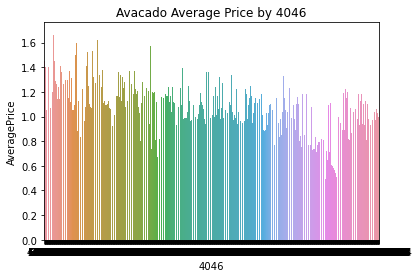

In [18]:
plt.figure()
plt.title("Avacado Average Price by 4046")
sns.barplot(x="4046",y="AveragePrice",data = df)
plt.show()

In [19]:
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

skewness of averageprice is -0.109444 which means any value 0.59 and <-0.59,skewness must be treated

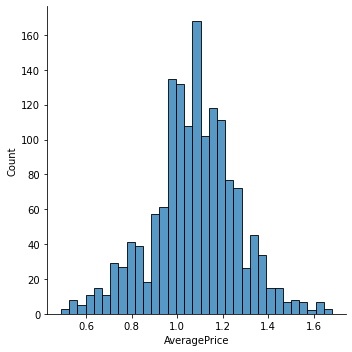

In [27]:
df_conventional=df[df['type']=='conventional']
sns.displot(df_conventional['AveragePrice'])
plt.show()

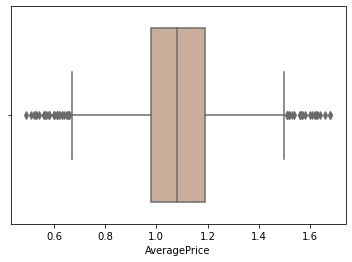

In [28]:
df_conventional=df[df['type']=='conventional']
sns.boxplot(df_conventional['AveragePrice'],palette='pink')
plt.show()


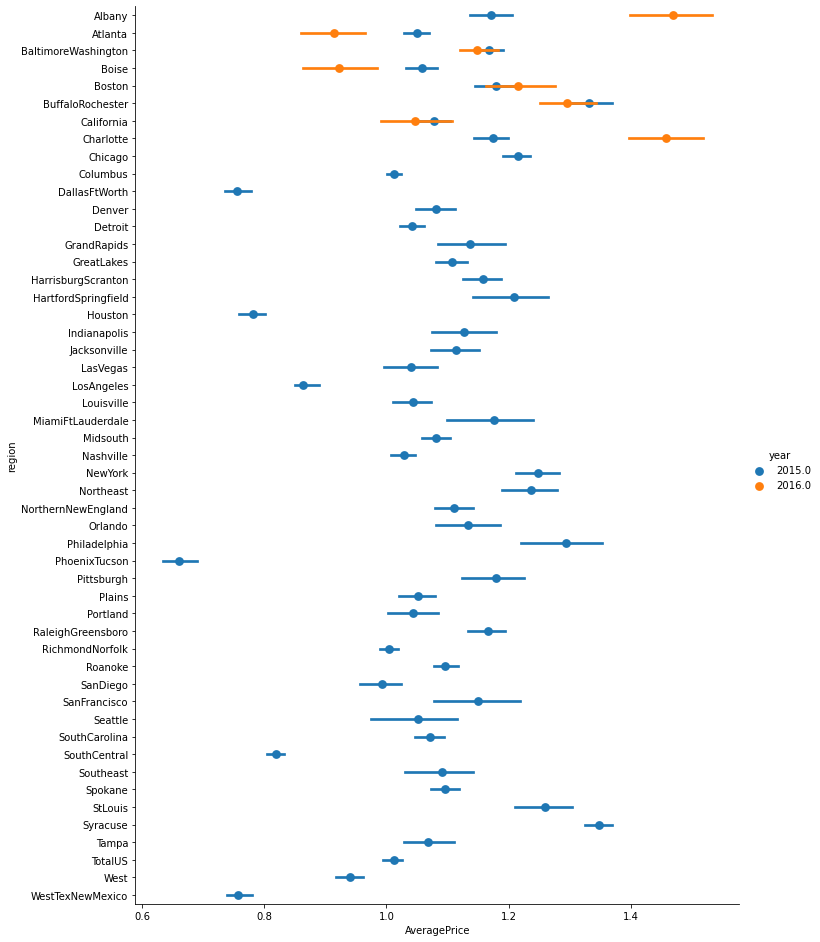

In [29]:
mask=df['type']=='conventional'
a=sns.factorplot('AveragePrice','region',data=df[mask],
  hue='year',size=13,aspect=0.8,palatte='spectral',join=False,)

price depends on even on the region in which avacado was sold

In [30]:
#checking correlation

In [31]:
corr_mat=df.corr()
corr_mat

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


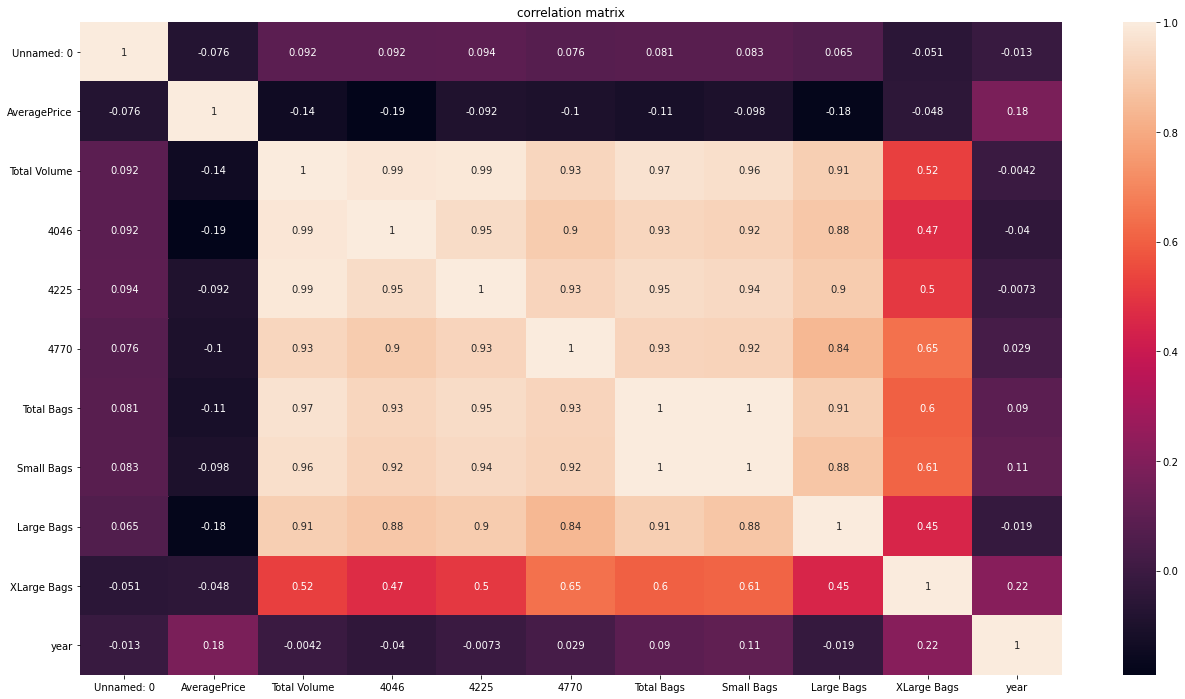

In [32]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title('correlation matrix')
plt.show()

In [33]:
#checking for outliers
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [34]:
#Handling missing values

By inference from data distribution nan values are filled using fillna()

In [35]:
df['Total Volume']=df['Total Volume'].fillna(df['Total Volume'].median())

In [36]:
df['AveragePrice']=df['AveragePrice'].fillna(df['AveragePrice'].median())

In [37]:
df['Total Bags']=df['Total Bags'].fillna(df['Total Bags'].mean())

In [113]:
df['4046']=df['4046'].fillna(df['4046'].median())

In [114]:
df['4225']=df['4225'].fillna(df['4225'].median())

In [115]:
df['4770']=df['4770'].fillna(df['4770'].mean())

In [118]:
df['Small Bags']=df['Small Bags'].fillna(df['Small Bags'].median())

In [120]:
df['Large Bags']=df['Large Bags'].fillna(df['Large Bags'].mean())

In [119]:
df['XLarge Bags']=df['XLarge Bags'].fillna(df['XLarge Bags'].mean())

In [121]:
df['4046']

0         1036.74
1          674.28
2          794.70
3         1132.00
4          941.48
           ...   
16463    81751.17
16464    81751.17
16465    81751.17
16466    81751.17
16467    81751.17
Name: 4046, Length: 16468, dtype: float64

In [122]:
df['4225']

0         54454.85
1         44638.81
2        109149.67
3         71976.41
4         43838.39
           ...    
16463    118664.89
16464    118664.89
16465    118664.89
16466    118664.89
16467    118664.89
Name: 4225, Length: 16468, dtype: float64

In [123]:
df['4770']

0           48.160000
1           58.330000
2          130.500000
3           72.580000
4           75.780000
             ...     
16463    50405.495399
16464    50405.495399
16465    50405.495399
16466    50405.495399
16467    50405.495399
Name: 4770, Length: 16468, dtype: float64

In [125]:
df['Small Bags']

0         8603.62
1         9408.07
2         8042.21
3         5677.40
4         5986.26
           ...   
16463    62375.69
16464    62375.69
16465    62375.69
16466    62375.69
16467    62375.69
Name: Small Bags, Length: 16468, dtype: float64

In [126]:
df['Large Bags']

0           93.250000
1           97.490000
2          103.140000
3          133.760000
4          197.690000
             ...     
16463    42642.049374
16464    42642.049374
16465    42642.049374
16466    42642.049374
16467    42642.049374
Name: Large Bags, Length: 16468, dtype: float64

In [127]:
df['XLarge Bags']

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
            ...     
16463    2181.771074
16464    2181.771074
16465    2181.771074
16466    2181.771074
16467    2181.771074
Name: XLarge Bags, Length: 16468, dtype: float64

In [38]:
df['Total Volume']

0         64236.62
1         54876.98
2        118220.22
3         78992.15
4         51039.60
           ...    
16463    402791.86
16464    402791.86
16465    402791.86
16466    402791.86
16467    402791.86
Name: Total Volume, Length: 16468, dtype: float64

In [39]:
df['AveragePrice']

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
16463    1.08
16464    1.08
16465    1.08
16466    1.08
16467    1.08
Name: AveragePrice, Length: 16468, dtype: float64

In [40]:
df['Total Bags']

0          8696.870000
1          9505.560000
2          8145.350000
3          5811.160000
4          6183.950000
             ...      
16463    293597.415735
16464    293597.415735
16465    293597.415735
16466    293597.415735
16467    293597.415735
Name: Total Bags, Length: 16468, dtype: float64

In [130]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [131]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,92,1.33,64236.62,1036.74,54454.85,48.160000,8696.870000,8603.62,93.250000,0.000000,0,0,0
1,68,1.35,54876.98,674.28,44638.81,58.330000,9505.560000,9408.07,97.490000,0.000000,0,0,0
2,44,0.93,118220.22,794.70,109149.67,130.500000,8145.350000,8042.21,103.140000,0.000000,0,0,0
3,20,1.08,78992.15,1132.00,71976.41,72.580000,5811.160000,5677.40,133.760000,0.000000,0,0,0
4,98,1.28,51039.60,941.48,43838.39,75.780000,6183.950000,5986.26,197.690000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,104,1.08,402791.86,81751.17,118664.89,50405.495399,293597.415735,62375.69,42642.049374,2181.771074,1,2,51
16464,104,1.08,402791.86,81751.17,118664.89,50405.495399,293597.415735,62375.69,42642.049374,2181.771074,1,2,51
16465,104,1.08,402791.86,81751.17,118664.89,50405.495399,293597.415735,62375.69,42642.049374,2181.771074,1,2,51
16466,104,1.08,402791.86,81751.17,118664.89,50405.495399,293597.415735,62375.69,42642.049374,2181.771074,1,2,51


#selecting the model

In [132]:
#extracting the month from date Applying labelencoder to convert string in to numerical value

In [133]:
from sklearn.preprocessing import LabelEncoder

In [134]:
LE=LabelEncoder()

In [135]:
df["Date"]=LE.fit_transform(df["Date"])

In [136]:
df['Date']

0         92
1         68
2         44
3         20
4         98
        ... 
16463    104
16464    104
16465    104
16466    104
16467    104
Name: Date, Length: 16468, dtype: int64

In [137]:
df["region"]=LE.fit_transform(df["region"])

In [138]:
df["region"]

0         0
1         0
2         0
3         0
4         0
         ..
16463    51
16464    51
16465    51
16466    51
16467    51
Name: region, Length: 16468, dtype: int64

In [139]:
df["year"]=LE.fit_transform(df["year"])

In [140]:
df["year"]

0        0
1        0
2        0
3        0
4        0
        ..
16463    2
16464    2
16465    2
16466    2
16467    2
Name: year, Length: 16468, dtype: int64

In [141]:
df["type"]=LE.fit_transform(df["type"])

In [142]:
df["type"]

0        0
1        0
2        0
3        0
4        0
        ..
16463    1
16464    1
16465    1
16466    1
16467    1
Name: type, Length: 16468, dtype: int64

In [143]:
#creating dummy variables

In [144]:
dummies=pd.get_dummies(df[['year','region','Date']],drop_first=True)
df_dummies=pd.concat([df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type']],dummies],axis=1)
target=df['AveragePrice']

#splitting data in to training and test data

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_dummies,target,test_size=0.30)

In [146]:
#standardizing the data

In [147]:
df_col_std=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

#standardscaler is used

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler=StandardScaler()
scaler.fit(X_train[df_col_std])
X_train[df_col_std]=scaler.transform(X_train[df_col_std])
X_test[df_col_std]=scaler.transform(X_test[df_col_std])

we are using xgboost in oder to evaluate the model and compare the model with other algorithm

In [150]:
!pip install xgboost

In [151]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=model.score(X_train,y_train)
print('Training score:',score)
score=model.score(X_test,y_test)
print('Testing score:',score)
output=pd.DataFrame({'Predicted':y_pred})

Training score: 0.9988439051442711
Testing score: 0.7800781868074537


#calculating mean absolute error,r2 score,mean squared error

In [154]:
mae=np.round(mean_absolute_error(y_test,y_pred),3)
print('Mean absolute error',mae)

Mean absolute error 0.006


In [155]:
score=np.round(r2_score(y_test,y_pred),3)
print('R2 score',score)

R2 score 0.78


In [156]:
mse=np.round(mean_squared_error(y_test,y_pred),3)
print('Mean Squared Error',mse)

Mean Squared Error 0.001


xg boost has 78% score 